# Coco dataset for traffic light states

We select a subset of the coco dataset to train models on the states of traffic lights, expressed in the classes \[traffic_light_green, traffic_light_red, traffic_light_amber, traffic_light_na\]. Included classes are:
* Car
* Truck
* Bus
* Motorcycle
* Bicycle
* Person
* Dog
* Cat
* Stop light
* Stop sign


### Subset sampling
We want 1000 annotations of traffic lights, roughly 250 per state. Steps:

* Randomly sample 1000 images and verify that the desired states are roughly balanced
* Count number of other objects in the selected images




In [1]:
%matplotlib inline
from pycocotools.coco import COCO

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
import random
import json
from shutil import copyfile

pylab.rcParams['figure.figsize'] = (15.0, 20.0)

In [127]:
dataDir='..'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

# load COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

loading annotations into memory...
Done (t=11.68s)
creating index...
index created!


In [128]:
# Map category ids to names
catIds = coco.getCatIds();

catNames = dict()
for i in range(len(catIds)):
    catNames[str(cats[i]['id'])] = cats[i]['name']  

## Example image with bounding box annotations

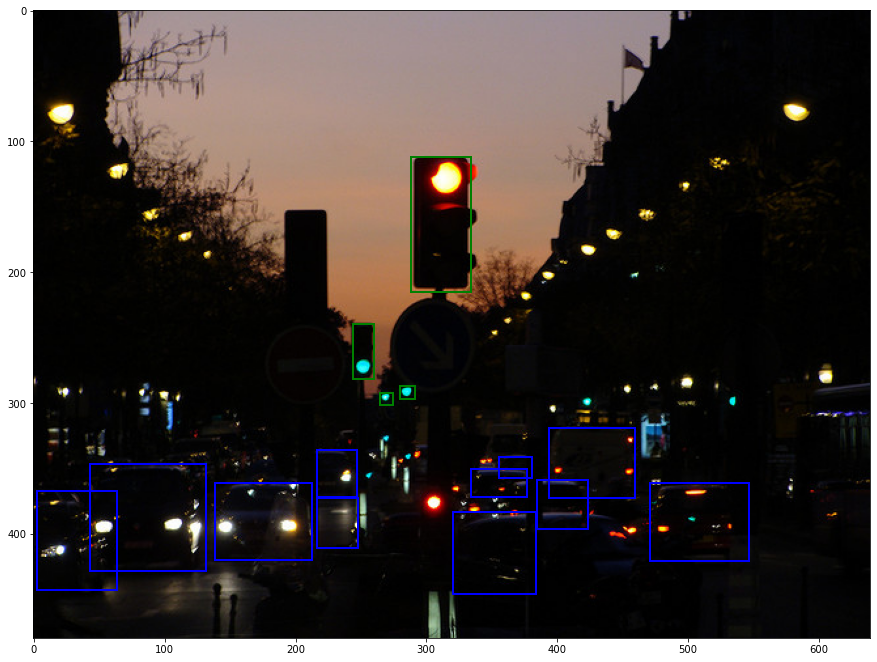

In [4]:
# Show selected images and draw boxes

names = ['cars', 'traffic light']
catIds = coco.getCatIds(catNms=names);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = imgIds[0:1]
#print('Number of images: ' + str(len(img)))

# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

# Get images
img = coco.loadImgs(imgIds)
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img[0]['file_name']))
fig, ax = plt.subplots()

# Colours for boxes
colours = {1: 'red', 3: 'blue', 10: 'green'}

for ann in anns:
    # Draw box
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2,edgecolor=colours[ann['category_id']], facecolor='none')
    ax.add_patch(bb)

ax.imshow(I)
#ax.axis('off')
plt.show()

# Create custom dataset

## Sample 1000 images with traffic lights

In [5]:
catIds = coco.getCatIds(catNms='traffic light');
imgIds_all_traffic_lights = coco.getImgIds(catIds=catIds );
print('Total number of images containing traffic lights: {}'.format(len(imgIds_all_traffic_lights)))

# Sample 1000 images from all images containing traffic lights
num_samples = 1000
random.seed(2004)
imgIds_sampled_traffic_lights = random.sample(imgIds_all_traffic_lights, num_samples)
imgs_sampled_traffic_lights = coco.loadImgs(imgIds_sampled_traffic_lights)
print('Sampled {} images containing traffic lights.'.format(num_samples))

# Load annotations for the sampled images
annIds_sampled_traffic_lights = coco.getAnnIds(imgIds_sampled_traffic_lights)
anns_sampled_traffic_lights = coco.loadAnns(annIds_sampled_traffic_lights) # List of dictionaries for each annotation
print('Number of object instances in the {} images: {}'.format(num_samples, len(annIds_sampled_traffic_lights)))

Total number of images containing traffic lights: 4139
Sampled 1000 images containing traffic lights.
Number of object instances in the 1000 images: 13247


In [6]:
def plot_instances_classes(anns):
    # Visualize number of instances in the sampled images
    num_instances_sampled = dict()

    # Extract category ids from each annotation
    for i in range(len(anns)):
        temp_cat = anns[i]['category_id']
        num_instances_sampled[str(temp_cat)] = num_instances_sampled.get(str(temp_cat), 0) + 1

    # Sort by category id and plot
    num_instances_sampled_sorted = dict()
    #names_temp = [cat['name'] for cat in cats]
    names = []

    for i in catNames.keys():
        try:
            num_instances_sampled_sorted[str(i)] = num_instances_sampled[str(i)]
            names.append(catNames[str(i)])
        except KeyError:
           pass
        
    plt.figure()
    plt.bar(names, num_instances_sampled_sorted.values())
    plt.xticks(rotation=90)
    plt.show()

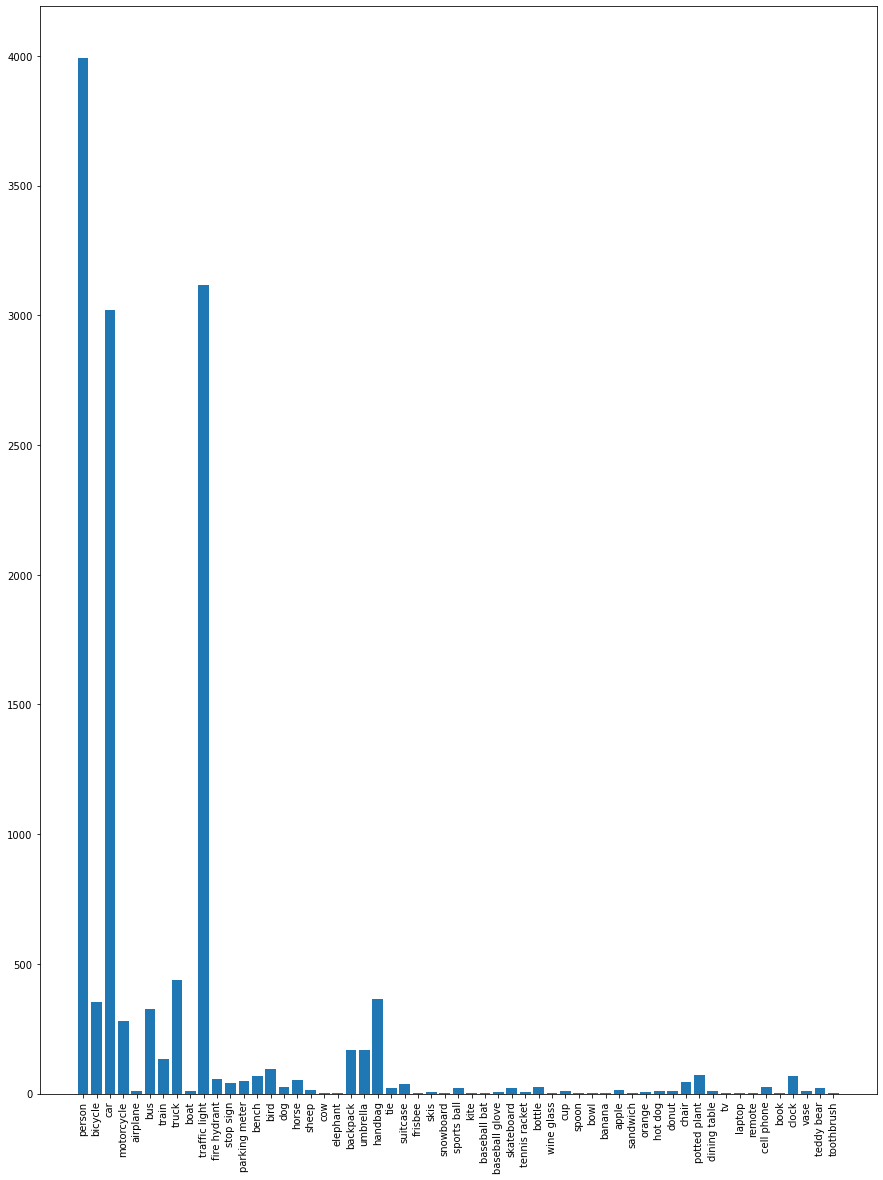

In [7]:
plot_instances_classes(anns_sampled_traffic_lights)

## Sample other object classes

In [8]:
classes = ['car', 'truck', 'bus', 'motorcycle', 'bicycle', 'person', 'dog', 'cat', 'stop light', 'stop sign', 'fire hydrant', 'train']
#classes = ['car', 'truck']
random.seed(2004)
num_samples = 1000

# Initialize with traffic light class. Append other annotations.
imgs_sampled = imgs_sampled_traffic_lights
anns_sampled = anns_sampled_traffic_lights

for cl in classes:
    catIds = coco.getCatIds(catNms=cl);
    imgIds_all_cl = coco.getImgIds(catIds=catIds);
    print('Total number of images containing object {}: {}'.format(cl, len(imgIds_all_cl)))

    # Sample num_samples number of images from all images with specified class
    imgIds_sampled_cl = random.sample(imgIds_all_cl, num_samples)
    imgs_sampled_cl = coco.loadImgs(imgIds_sampled_cl)
    
    #imgs_sampled_other_classes[str(cl)] = imgs_sampled_cl
    
    for l in imgs_sampled_cl:
        imgs_sampled.append(l)
        
    print('Sampled {} images containing object {}.'.format(num_samples, cl))

    # Load annotations for the sampled images
    annIds_sampled_cl = coco.getAnnIds(imgIds_sampled_cl)
    anns_sampled_cl = coco.loadAnns(annIds_sampled_cl) # List of dictionaries for each annotation
    
    #anns_sampled_other_classes[str(cl)] = anns_sampled_cl
    
    for l in anns_sampled_cl:
        anns_sampled.append(l)
    print('Number of object instances in the {} images: {}\n----------'.format(num_samples, len(annIds_sampled_cl)))


Total number of images containing object car: 12251
Sampled 1000 images containing object car.
Number of object instances in the 1000 images: 12215
----------
Total number of images containing object truck: 6127
Sampled 1000 images containing object truck.
Number of object instances in the 1000 images: 11275
----------
Total number of images containing object bus: 3952
Sampled 1000 images containing object bus.
Number of object instances in the 1000 images: 11844
----------
Total number of images containing object motorcycle: 3502
Sampled 1000 images containing object motorcycle.
Number of object instances in the 1000 images: 11248
----------
Total number of images containing object bicycle: 3252
Sampled 1000 images containing object bicycle.
Number of object instances in the 1000 images: 12930
----------
Total number of images containing object person: 64115
Sampled 1000 images containing object person.
Number of object instances in the 1000 images: 10010
----------
Total number of im

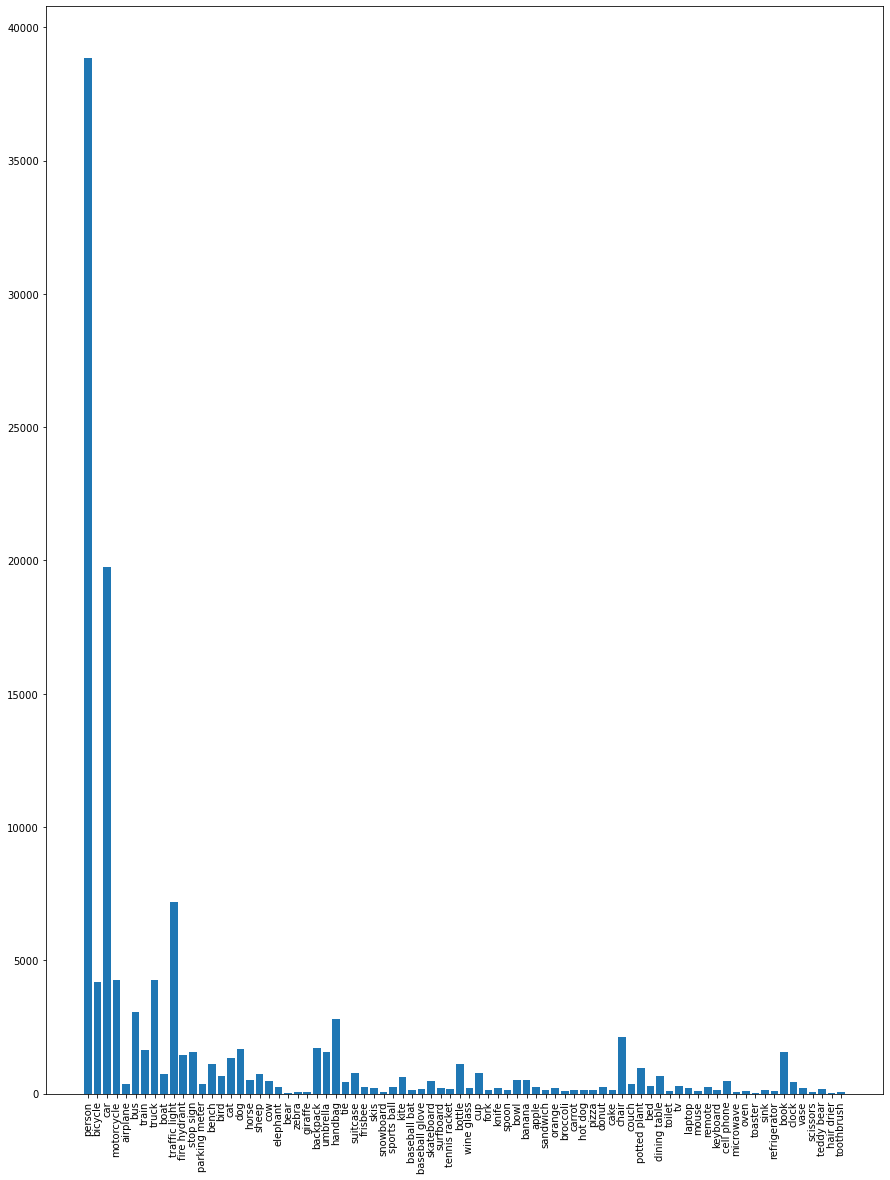

In [9]:
# Plots everything
plot_instances_classes(anns_sampled)

## Remove other classes from annotation

In [10]:
class_names = ['traffic light', 'car', 'truck', 'bus', 'motorcycle', 'bicycle', 'person', 'dog', 'cat', 'stop light', 'stop sign', 'fire hydrant', 'train']
anns_sampled_cleaned = []

for ann in anns_sampled:
    if ann['category_id'] in coco.getCatIds(catNms=class_names):
        anns_sampled_cleaned.append(ann)
        
print('Removed {} annototations from the data.\nNumber of images: {}\nNumber of annotations: {}'.format(len(anns_sampled)-len(anns_sampled_cleaned), 
len(imgs_sampled), len(anns_sampled_cleaned)))

Removed 28888 annototations from the data.
Number of images: 13000
Number of annotations: 89194


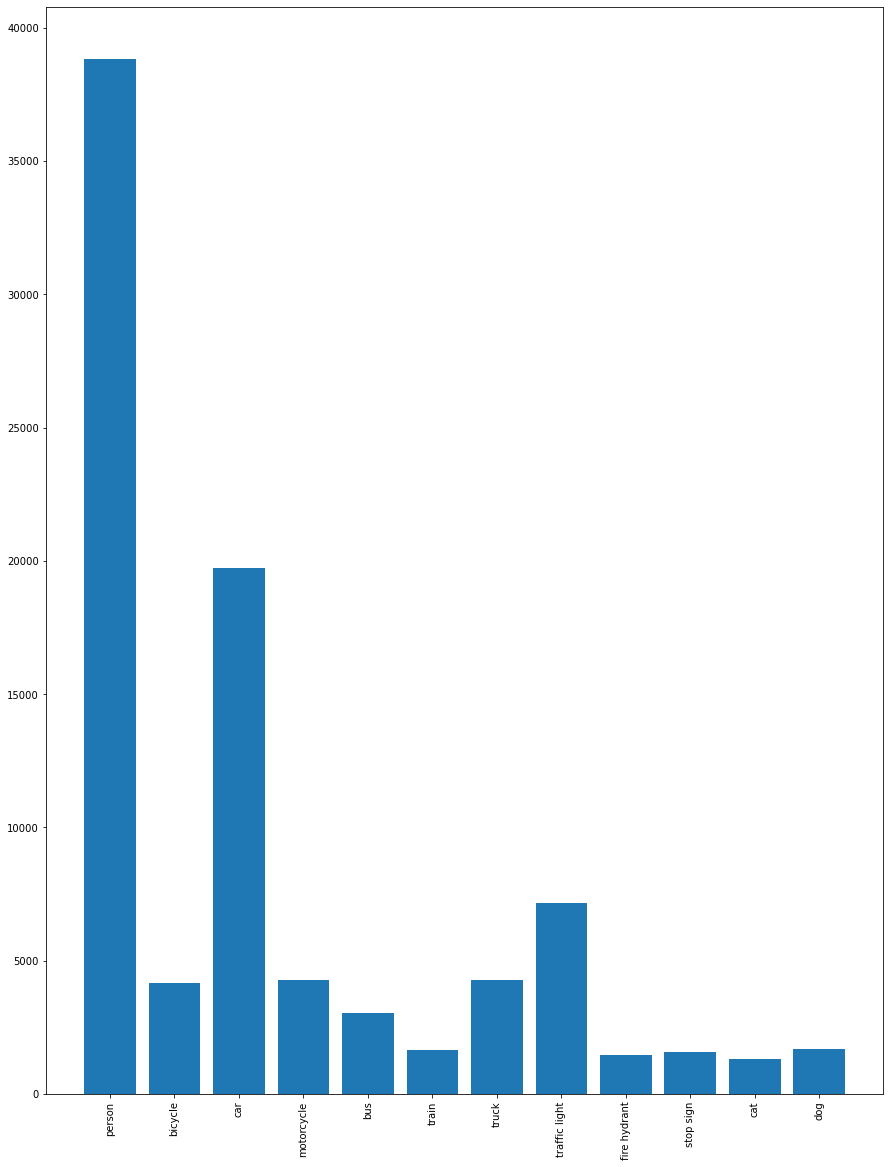

In [11]:
plot_instances_classes(anns_sampled_cleaned)

## Generate final sampled dataset

Final output is a dataset with keys 
`['info', 'licenses', 'images', 'annotations', 'categories']`.



In [12]:
def save_dataset(imgs, anns, filename):

    # Load dataset val to get structure
    test = '../annotations/instances_val2017.json'
    target_file = json.load(open(test, 'r'))

    # Make final dictionary
    dataset = dict.fromkeys(target_file.keys())
    dataset['info'] = target_file['info']
    dataset['licenses'] = target_file['licenses']
    dataset['categories'] = target_file['categories']
    dataset['annotations'] = anns
    dataset['images'] = imgs

    # Save to disk
    with open('../annotations/instances_'+str(filename)+'.json', 'w', encoding='utf-8') as f:
        json.dump(dataset, f, ensure_ascii=False, indent=4)

    print('Saved dataset {} to disk!'.format(filename))

In [17]:
def copy_images(imgIds, foldername):
    path = '../images/'
    count = 0
    for img in imgIds:
        filename = img['file_name']
        try:
            copyfile(path+'train2017/'+filename, path+foldername+'/'+filename)
            count +=1
        except FileNotFoundError:
            print('Folder {} does not exist. Please create it and try again.'.format(path+foldername))
            return
        
    print('Copied {} images to {}'.format(count, path+foldername))

In [14]:
save_dataset(imgs_sampled, anns_sampled_cleaned, 'custom')

Saved dataset custom to disk!


In [ ]:
# Copy image file
copy_images(imgs_sampled, 'custom')

## Split train and validation
Make 80/20 split

In [15]:
dataDir='..'
dataType='custom'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize COCO api for instance annotations
coco=COCO(annFile)

# Load COCO categories and supercategories
imgIds = coco.getImgIds()
print('Number of images: ' + str(len(imgIds)))

# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

loading annotations into memory...
Done (t=0.99s)
creating index...
index created!
Number of images: 11824


In [16]:
# Sample 2200 from imgs_sampled and add to imgs_val.
random.seed(1998)
imgIds_val = random.sample(imgIds, 2600)

# Take imgs_val, imgs_sampled and put non-overlap into imgs_train.
imgIds_train = []
for el in imgIds:
    if el not in imgIds_val:
        imgIds_train.append(el)

print('Number of training samples: {}\nNumber of validation samples: {}\n'.format(len(imgIds_train), len(imgIds_val)))

# Get annotations for train and val.
annIds_train = coco.getAnnIds(imgIds_train)
anns_train = coco.loadAnns(annIds_train)
annIds_val = coco.getAnnIds(imgIds_val)
anns_val = coco.loadAnns(annIds_val)
print('Number of training annotations: {}\nNumber of validation annotations: {}\n'.format(len(anns_train), len(anns_val)))  

# Get images.
imgs_train = coco.loadImgs(imgIds_train)
imgs_val = coco.loadImgs(imgIds_val)

# Save annotations.
save_dataset(imgs_train, anns_train, 'train_custom')
save_dataset(imgs_val, anns_val, 'val_custom')

Number of training samples: 9224
Number of validation samples: 2600

Number of training annotations: 69561
Number of validation annotations: 19633
Saved dataset train_custom to disk!
Saved dataset val_custom to disk!


In [18]:
# Copy images to the folders train and val.
copy_images(imgs_train, 'train_custom')
copy_images(imgs_val, 'val_custom')

Copied 9224 images to ../images/train_customcustom
Copied 2600 images to ../images/val_customcustom


# Check the splits

In [2]:
def load_dataset(dataset):

    dataDir='..'
    dataType=dataset+'_custom'
    annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

    # Initialize COCO api for instance annotations
    coco=COCO(annFile)

    # Load COCO categories and supercategories
    imgIds = coco.getImgIds()
    print('Number of images: ' + str(len(imgIds)))

    # Load annotations
    annIds = coco.getAnnIds(imgIds)
    anns = coco.loadAnns(annIds)

    # Load images
    imgs = coco.loadImgs(imgIds)

    return imgs, anns

In [3]:
imgs_train, anns_train = load_dataset('train')
imgs_val, anns_val = load_dataset('val')

loading annotations into memory...
Done (t=0.97s)
creating index...
index created!
Number of images: 9224
loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Number of images: 2600


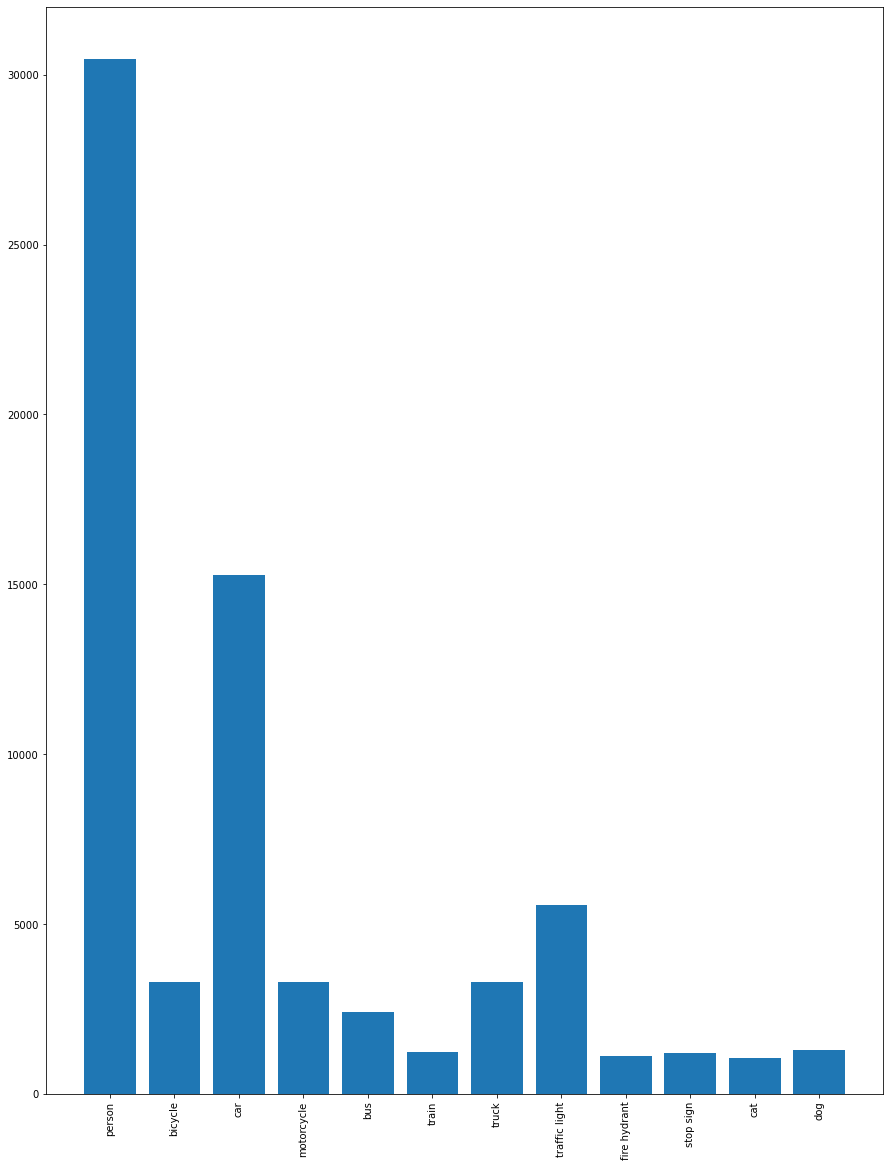

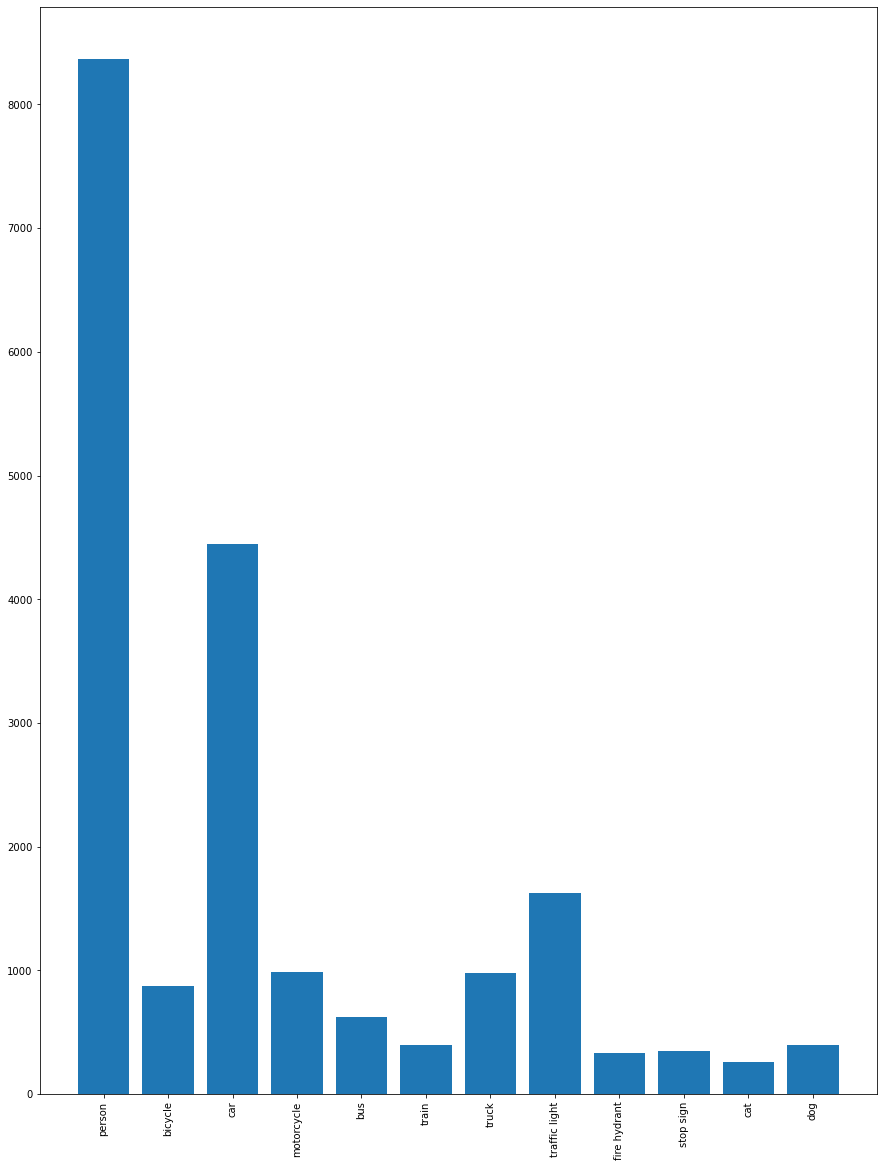

In [21]:
plot_instances_classes(anns_train)
plot_instances_classes(anns_val)

## TEST

In [131]:
def show_image_annotations(imgIds=None):
    """"
    Displays a random or the specified image with all annotations
    
    Args:
    img  -- One image id. If none is given randomly selects an image.
    """
    
    # Randomly select an image if no id is provided
    if imgIds is None:
        imgIds = random.choice(coco.getImgIds())

    print('Showing image {}'.format(imgIds))
    
    # Load annotations
    annIds = coco.getAnnIds(imgIds)
    anns = coco.loadAnns(annIds)

    # Get images
    img = coco.loadImgs(imgIds)
    I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img[0]['file_name']))
    fig, ax = plt.subplots()

    # Colours for boxes
    colours = {1: 'red', 3: 'blue', 10: 'green'}

    for ann in anns:
        # Draw box
        box = ann['bbox']
        label = catNames[str(ann['category_id'])]
        plt.text(box[0]+1,box[1]-5, label,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'red'})
        bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2,edgecolor='red', facecolor='none')
        ax.add_patch(bb)

    ax.imshow(I)
    #ax.axis('off')
    plt.show()

In [62]:
dataset = 'train'

dataDir='..'
dataType=dataset+'_custom'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.05s)
creating index...
index created!


Showing image 301209


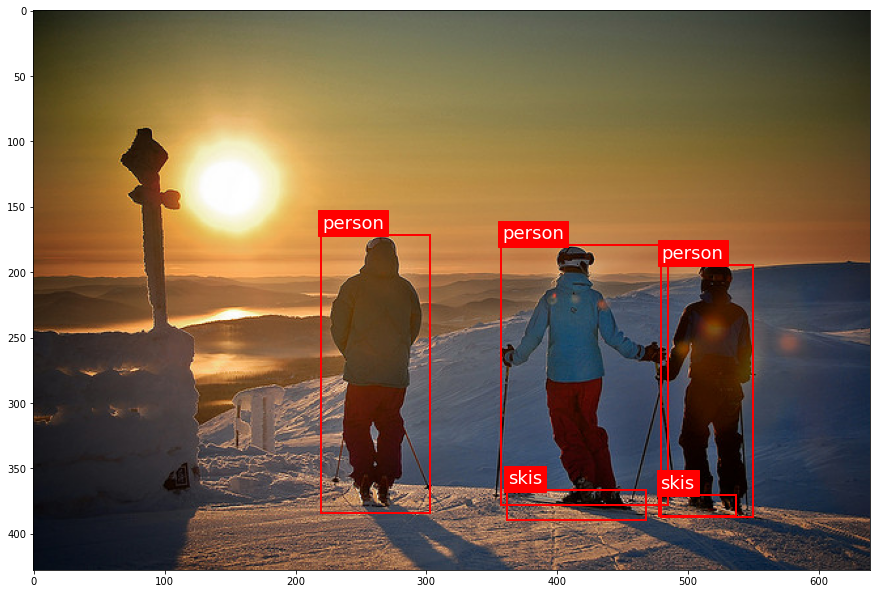

In [135]:

show_image_annotations()

In [123]:
anns_val[5]['category_id']

1

In [130]:
catNames[str(anns_val[5]['category_id'])]

'person'